# Mini Project
#### Group 10

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [15]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib.dates as mdates
import matplotlib.pylab as plt
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import tkinter as tk

import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas_ta  as ta #pip install pandas-ta


In [16]:
AppleData = pd.read_csv('AAPL.csv')
AppleData['Date'] = pd.to_datetime(AppleData['Date'], format="%m/%d/%Y")
AppleData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600


In [17]:
AppleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10272 non-null  datetime64[ns]
 1   Open       10272 non-null  float64       
 2   High       10272 non-null  float64       
 3   Low        10272 non-null  float64       
 4   Close      10272 non-null  float64       
 5   Adj Close  10272 non-null  float64       
 6   Volume     10272 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 561.9 KB


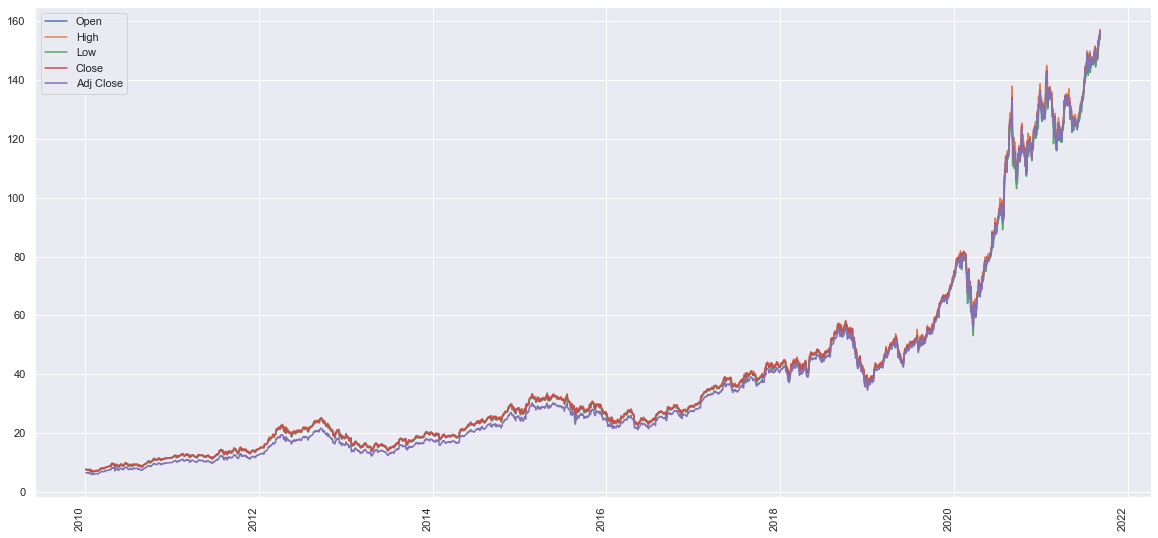

In [18]:
#filter data part
apo = AppleData
AppleData = AppleData[(AppleData['Date'] > '01/01/2010')]

ap = AppleData[["Date","Open","High","Low","Close","Adj Close"]]#.tail(10)

#ax = ap.set_index('Date').plot(x_compat=True,figsize=(20, 10))

ap.set_index('Date', inplace = True)
ap.index = pd.to_datetime(ap.index).date
ax = ap.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.xticks(rotation=90);


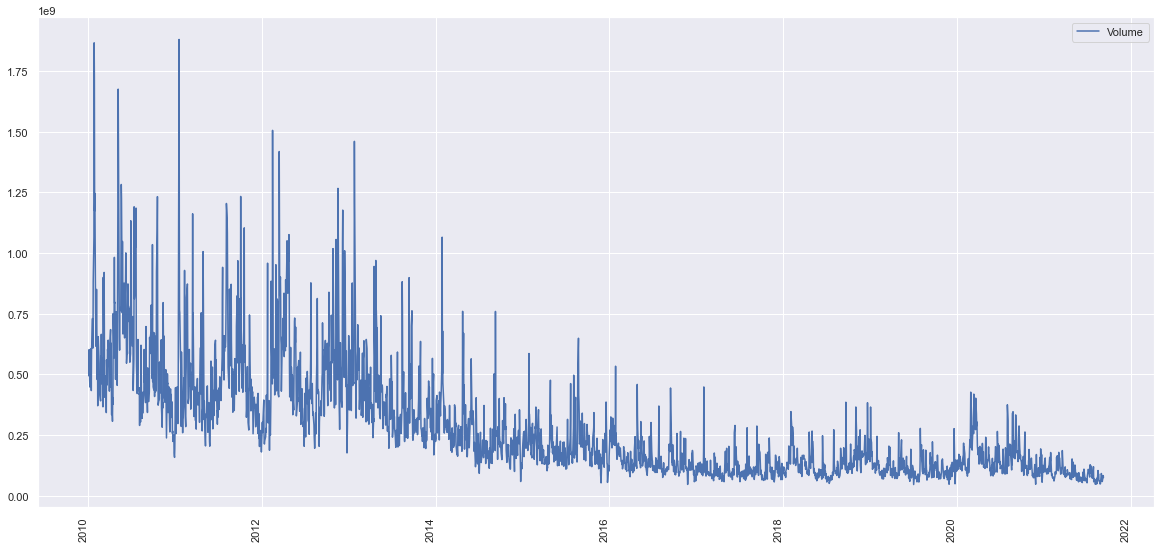

In [19]:
apv = AppleData[["Date","Volume"]]#.tail(100)

#ax = ap.set_index('Date').plot(x_compat=True,figsize=(20, 10))

apv.set_index('Date', inplace = True)
apv.index = pd.to_datetime(apv.index).date
ax = apv.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.xticks( rotation=90);

<AxesSubplot:>

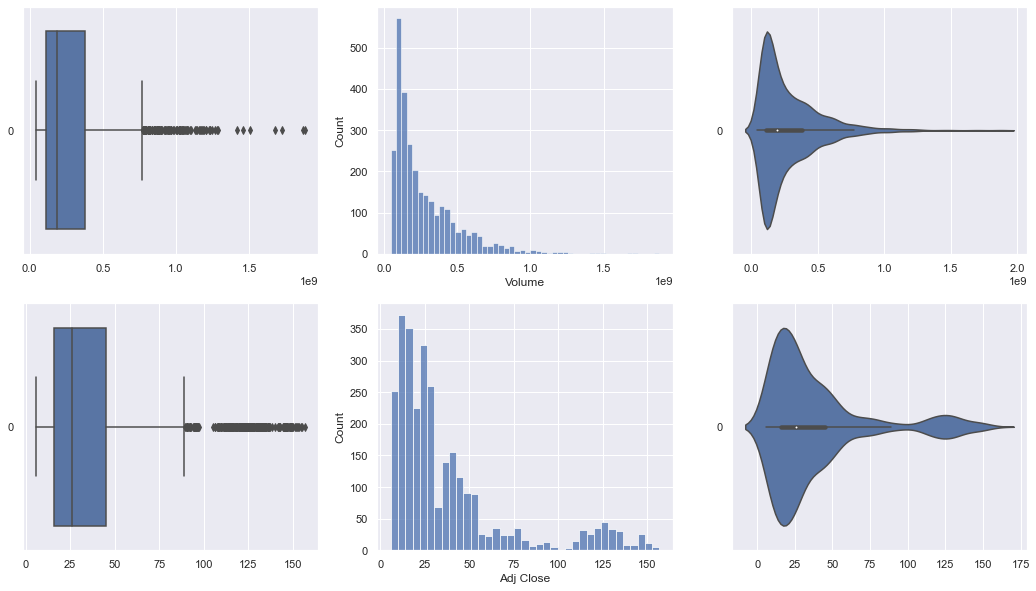

In [20]:
f, axes = plt.subplots(2, 3, figsize=(18, 10))

sb.boxplot(data = apv["Volume"], orient = "h", ax = axes[0,0])
sb.histplot(data = apv["Volume"], ax = axes[0,1])
sb.violinplot(data = apv["Volume"], orient = "h", ax = axes[0,2])

sb.boxplot(data = ap["Adj Close"], orient = "h", ax = axes[1,0])
sb.histplot(data = ap["Adj Close"], ax = axes[1,1])
sb.violinplot(data = ap["Adj Close"], orient = "h", ax = axes[1,2])

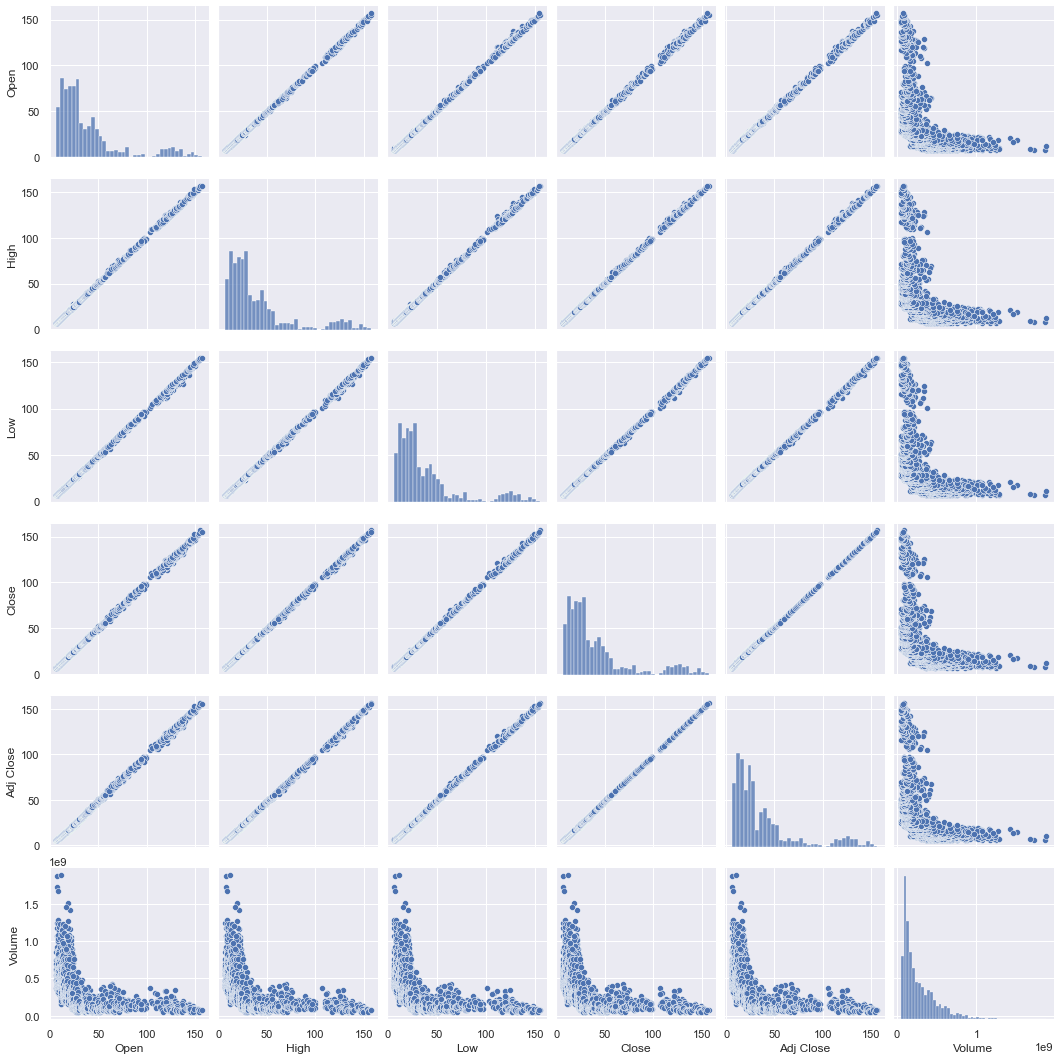

In [21]:
sb.pairplot(data = AppleData)

In [22]:
AppleData.corr(method ='pearson')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999890,0.999843,0.999739,0.999620,-0.481545
High,0.999890,1.000000,0.999803,0.999864,0.999755,-0.479776
Low,0.999843,0.999803,1.000000,0.999865,0.999746,-0.484592
Close,0.999739,0.999864,0.999865,1.000000,0.999885,-0.482303
Adj Close,0.999620,0.999755,0.999746,0.999885,1.000000,-0.481296
Volume,-0.481545,-0.479776,-0.484592,-0.482303,-0.481296,1.000000


## Getting NewsData

In [23]:
import http.client
import requests
from urllib.request import Request, urlopen
import json

import pandas as pd

from pathlib import Path 

#### Apple News data from 12/1/2006 - 11/30/2016

In [65]:
AppleNews = pd.read_csv('AppleNewsStock.csv/AppleNewsStock.csv')
AppleNews.head()

,Date,Open,High,Low,Close,Adj Close,Volume,News
0,12/1/2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...
1,12/4/2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,More on Housing Prices : The broadest governme...
2,12/5/2006,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,NaN
3,12/6/2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,Honoring R.W. Apple in Words and Food : About ...
4,12/7/2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"Homebuilders, and Worries Over Jobs, Lead a De..."


In [51]:
AppleNews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
 7   News       2323 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 157.4+ KB


In [40]:
url = "https://google-news1.p.rapidapi.com/search"

querystring = {"q":"Apple","country":"US","lang":"en","before":"2021-10-10","after":"2021-09-08"}

headers = {
	"X-RapidAPI-Host": "google-news1.p.rapidapi.com",
	"X-RapidAPI-Key": "60ba6c2c8emsha8a15e53ec84acdp14aeb3jsncd684f9e15bd"
}

response = requests.request("GET", url, headers=headers, params=querystring)
x = response.text

In [43]:
data = json.loads(x)
News_Test = pd.json_normalize(data["articles"])
#News_Test.head()

#### Apple News data from 9/8/2021 - 10/8/2021

In [47]:
News_Test = pd.read_csv('AppleNewsStock.csv/APPLNEWS_TEST.csv',encoding='cp1252')
News_Test.head()

,published_date,Date,title,link
0,2021-09-08T07:00:00+00:00,9/8/2021,"New iPhones Are Coming. Apple Stock Is a Buy, ...",https://www.barrons.com/articles/new-iphones-a...
1,2021-09-08T07:00:00+00:00,9/8/2021,Apple App Store Changes Fail to Stem Push for ...,https://www.bloomberg.com/news/articles/2021-0...
2,2021-09-09T07:00:00+00:00,9/9/2021,Apple fires senior engineering program manager...,https://www.theverge.com/2021/9/9/22666049/app...
3,2021-09-09T07:00:00+00:00,9/9/2021,Apple may have solved bending batteries for th...,https://appleinsider.com/articles/21/09/09/app...
4,2021-09-09T07:00:00+00:00,9/9/2021,Apple Watch Chief Kevin Lynch Now Leading Appl...,https://www.macrumors.com/2021/09/09/kevin-lyn...


### Cleaning News data





In [88]:
d = AppleNews
d = d[d['News'].str.contains('apple|iphone|ipad', case=False, na=False,regex=True)]
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 3 to 2510
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1882 non-null   object 
 1   Open       1882 non-null   float64
 2   High       1882 non-null   float64
 3   Low        1882 non-null   float64
 4   Close      1882 non-null   float64
 5   Adj Close  1882 non-null   float64
 6   Volume     1882 non-null   int64  
 7   News       1882 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 132.3+ KB


### Classify article with News data

#### Why?

https://www.lehnerinvestments.com/en/sentiment-analysis-stock-market-sentiment/

#### effective?

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8053016/

##### with  Natural Language Toolkit (NLTK) is an open source Python library for Natural Language Processing
https://www.nltk.org/index.html

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664#:~:text=VADER%20





In [97]:
import nltk #pip install --user -U nltk
#nltk.download('vader_lexicon') #use this one too

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [110]:
pd.options.mode.chained_assignment = None  # default='warn'
d['scores'] = d['News'].apply(lambda News: sid.polarity_scores(News))
d['compound']  = d['scores'].apply(lambda score_dict: score_dict['compound'])
d['comp_score'] = d['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

d.head()

,Date,Open,High,Low,Close,Adj Close,Volume,News,scores,compound,comp_score
3,12/6/2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,Honoring R.W. Apple in Words and Food : About ...,"{'neg': 0.029, 'neu': 0.878, 'pos': 0.093, 'co...",0.6858,pos
9,12/14/2006,12.721429,12.857142,12.608571,88.549995,12.650000,208082700,"Adam, She’s Ms. Madam : Kristin Chenoweth uses...","{'neg': 0.03, 'neu': 0.87, 'pos': 0.099, 'comp...",0.9656,pos
10,12/15/2006,12.717143,12.745714,12.475715,87.720001,12.531428,184984800,"Adam, She’s Ms. Madam : Kristin Chenoweth uses...","{'neg': 0.051, 'neu': 0.905, 'pos': 0.044, 'co...",-0.5228,neg
11,12/18/2006,12.518572,12.571428,12.084286,85.470001,12.210000,180394200,Apple Delays Earnings Statement Due to Options...,"{'neg': 0.03, 'neu': 0.887, 'pos': 0.082, 'com...",0.7059,pos
13,12/20/2006,12.352858,12.381429,12.105714,84.759995,12.108571,141922900,Recent Openings : New shows in New York inclu...,"{'neg': 0.131, 'neu': 0.781, 'pos': 0.088, 'co...",-0.8020,neg


Ratio of classes is Y : N =  1514 : 368


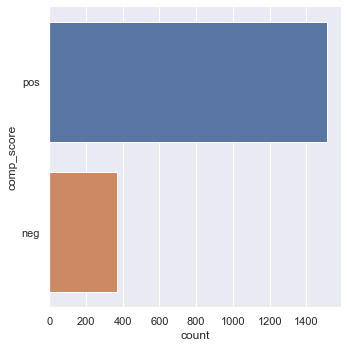

In [143]:
sb.catplot(y = 'comp_score', data = d, kind = "count")
countY, countX = d.comp_score.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)

<AxesSubplot:xlabel='Adj Close', ylabel='comp_score'>

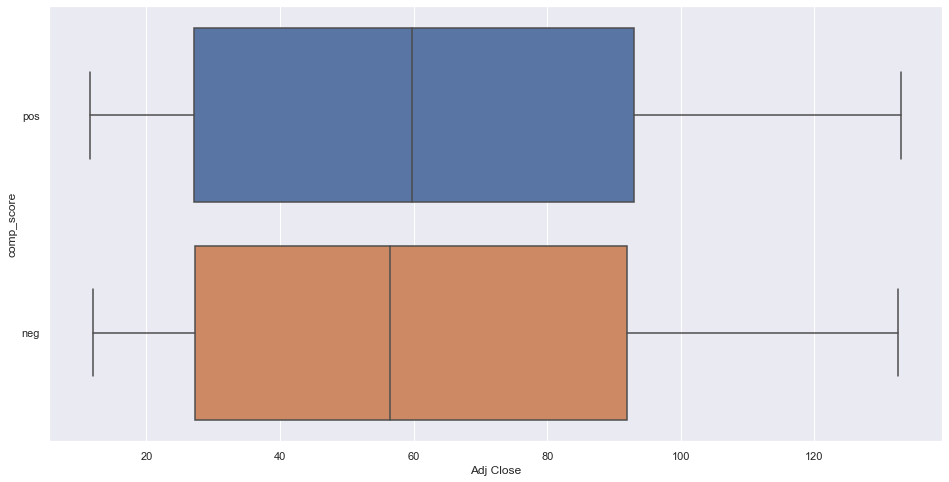

In [146]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Adj Close', y = 'comp_score', data = d)

In [131]:
x = pd.DataFrame(d['Adj Close'])
y = pd.DataFrame(d['comp_score'])

x_train, x_test, y_train, y_test = train_test_split( x, y,  test_size = 0.2)
# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (1505, 1) (1505, 1)
Test Set  : (377, 1) (377, 1)


In [129]:
# Create a Decision Tree Classifier object
dectree2 = DecisionTreeClassifier(max_depth = 2)
dectree4 = DecisionTreeClassifier(max_depth = 4)

## Degree 2

[Text(334.8, 543.6, 'Adj Close <= 36.621\ngini = 0.32\nsamples = 1505\nvalue = [301, 1204]\nclass = Pos'),
 Text(167.4, 326.16, 'Adj Close <= 31.919\ngini = 0.345\nsamples = 509\nvalue = [113, 396]\nclass = Pos'),
 Text(83.7, 108.72000000000003, 'gini = 0.316\nsamples = 452\nvalue = [89, 363]\nclass = Pos'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.488\nsamples = 57\nvalue = [24, 33]\nclass = Pos'),
 Text(502.20000000000005, 326.16, 'Adj Close <= 37.094\ngini = 0.306\nsamples = 996\nvalue = [188, 808]\nclass = Pos'),
 Text(418.5, 108.72000000000003, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = Pos'),
 Text(585.9, 108.72000000000003, 'gini = 0.308\nsamples = 987\nvalue = [188, 799]\nclass = Pos')]

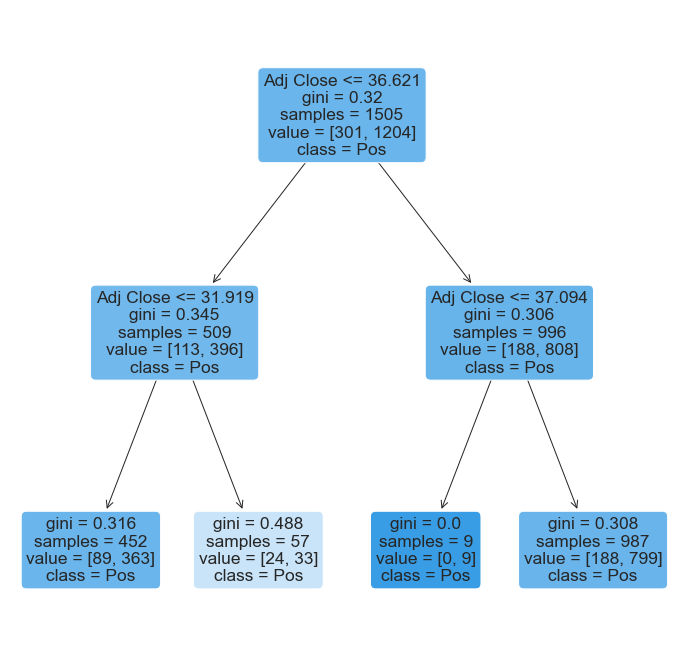

In [149]:
dectree2.fit(x_train,y_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["Adj Close"], 
          class_names=["Neg","Pos"])

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8222811671087533

Train set
True Positive Rate 	:  1.0
False Positive Rate 	:  1.0
Train set
True Positive Rate 	:  1.0
False Positive Rate 	:  1.0


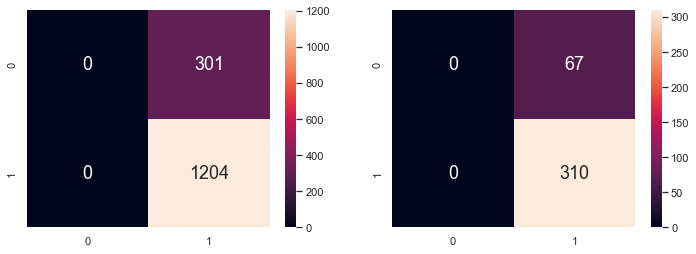

In [136]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree2.predict(x_train)
y_test_pred = dectree2.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


cftr = confusion_matrix(y_train, y_train_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

cftr = confusion_matrix(y_test, y_test_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

## Degree 4

[Text(774.225, 1174.1760000000002, 'Adj Close <= 36.621\ngini = 0.32\nsamples = 1505\nvalue = [301, 1204]\nclass = Pos'),
 Text(544.0500000000001, 913.248, 'Adj Close <= 31.919\ngini = 0.345\nsamples = 509\nvalue = [113, 396]\nclass = Pos'),
 Text(334.8, 652.3200000000002, 'Adj Close <= 25.718\ngini = 0.316\nsamples = 452\nvalue = [89, 363]\nclass = Pos'),
 Text(167.4, 391.39200000000005, 'Adj Close <= 24.792\ngini = 0.294\nsamples = 341\nvalue = [61, 280]\nclass = Pos'),
 Text(83.7, 130.46400000000017, 'gini = 0.306\nsamples = 324\nvalue = [61, 263]\nclass = Pos'),
 Text(251.10000000000002, 130.46400000000017, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = Pos'),
 Text(502.20000000000005, 391.39200000000005, 'Adj Close <= 26.069\ngini = 0.377\nsamples = 111\nvalue = [28, 83]\nclass = Pos'),
 Text(418.5, 130.46400000000017, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Neg'),
 Text(585.9, 130.46400000000017, 'gini = 0.353\nsamples = 105\nvalue = [24, 81]\nclass = Pos'),
 Tex

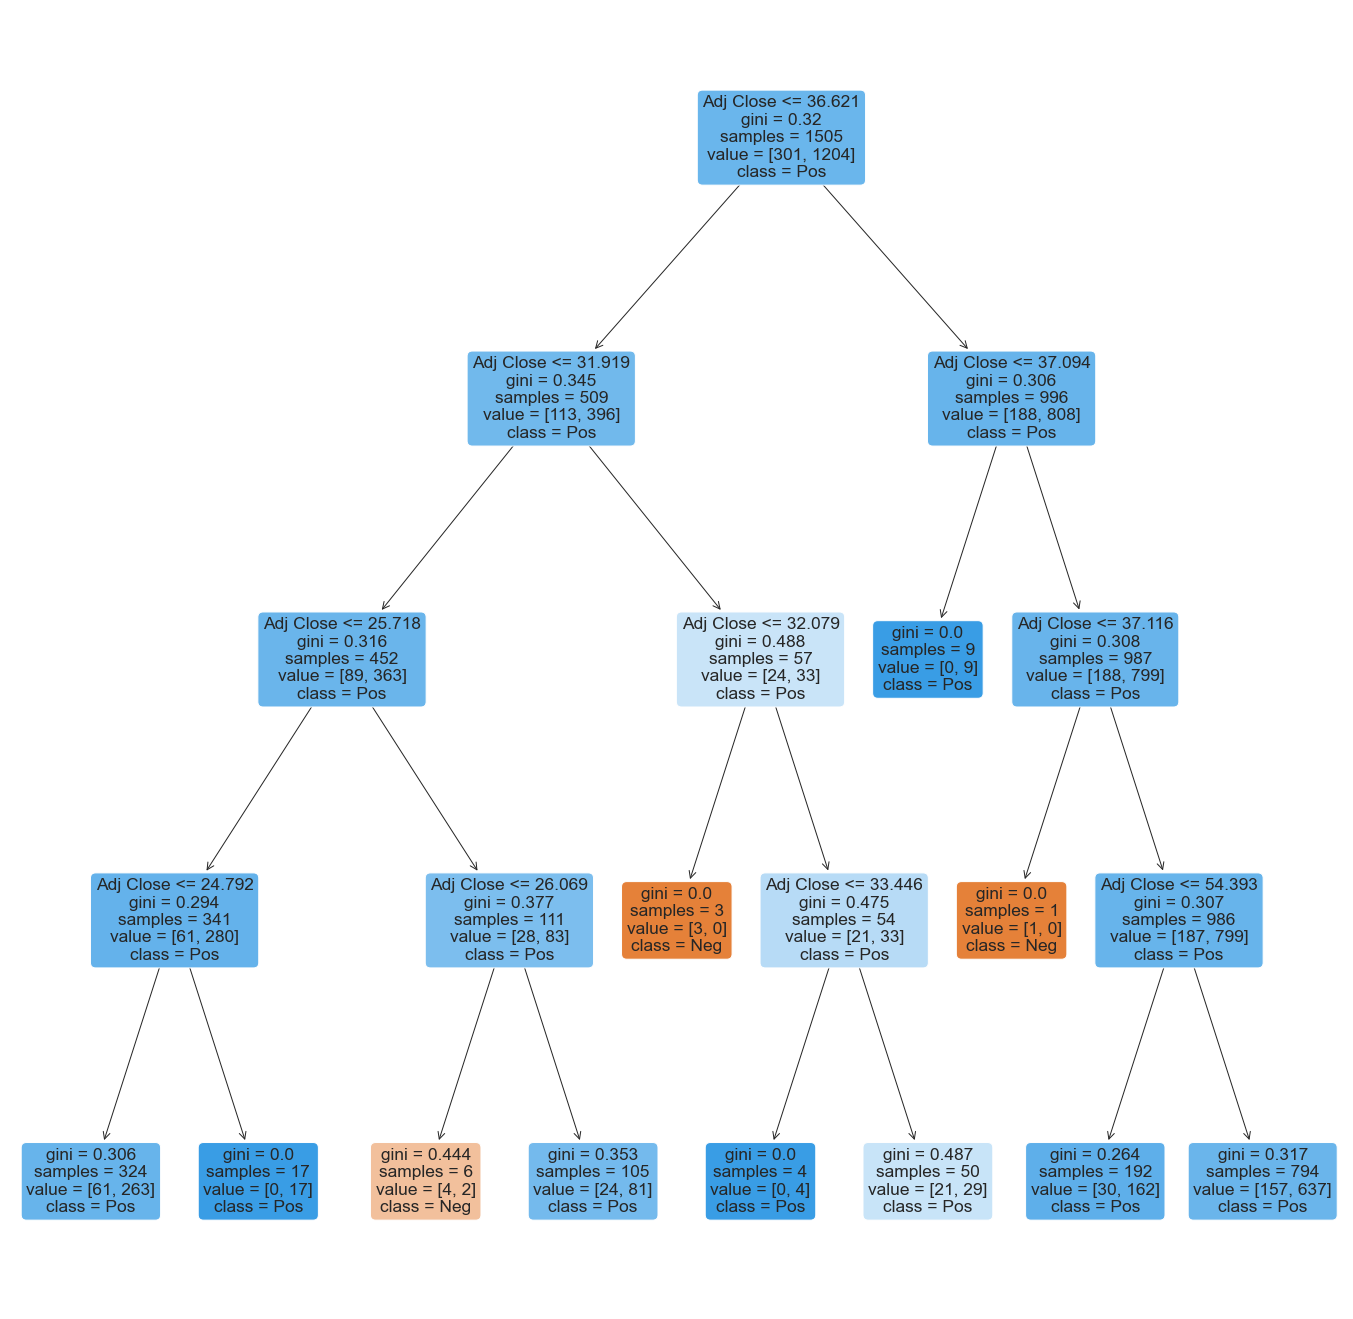

In [150]:
dectree4.fit(x_train,y_train)

f = plt.figure(figsize=(24,24))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["Adj Close"], 
          class_names=["Neg","Pos"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8222811671087533

Train set
True Positive Rate 	:  0.9983388704318937
False Positive Rate 	:  0.973421926910299
Train set
True Positive Rate 	:  1.0
False Positive Rate 	:  1.0


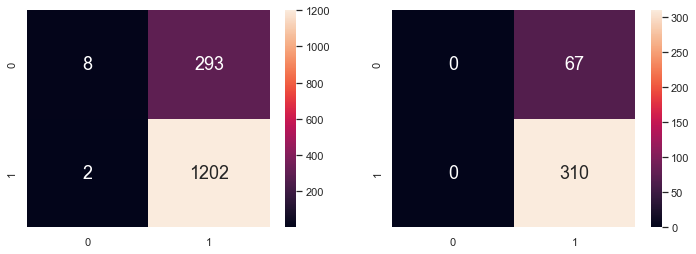

In [137]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree4.predict(x_train)
y_test_pred = dectree4.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


cftr = confusion_matrix(y_train, y_train_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

cftr = confusion_matrix(y_test, y_test_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

## Pred Range News test categorize

In [155]:
#pred range data
pred=pd.read_csv('AAPLTest.csv')
pred.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-09,155.490005,156.110001,153.949997,154.070007,153.649719,57305700
1,2021-09-10,155.000000,155.479996,148.699997,148.970001,148.563614,140646400
2,2021-09-13,150.630005,151.419998,148.750000,149.550003,149.142044,102404300
3,2021-09-14,150.350006,151.070007,146.910004,148.119995,147.715927,109296300
4,2021-09-15,148.559998,149.440002,146.369995,149.029999,148.623444,83281300


In [140]:
pd.options.mode.chained_assignment = None  # default='warn'
News_Test['scores'] = News_Test['title'].apply(lambda News: sid.polarity_scores(News))
News_Test['compound']  = News_Test['scores'].apply(lambda score_dict: score_dict['compound'])
News_Test['comp_score'] = News_Test['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

News_Test#.head()

,published_date,Date,title,link,scores,compound,comp_score
0,2021-09-08T07:00:00+00:00,9/8/2021,"New iPhones Are Coming. Apple Stock Is a Buy, ...",https://www.barrons.com/articles/new-iphones-a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,2021-09-08T07:00:00+00:00,9/8/2021,Apple App Store Changes Fail to Stem Push for ...,https://www.bloomberg.com/news/articles/2021-0...,"{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...",-0.5423,neg
2,2021-09-09T07:00:00+00:00,9/9/2021,Apple fires senior engineering program manager...,https://www.theverge.com/2021/9/9/22666049/app...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,2021-09-09T07:00:00+00:00,9/9/2021,Apple may have solved bending batteries for th...,https://appleinsider.com/articles/21/09/09/app...,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.2732,pos
4,2021-09-09T07:00:00+00:00,9/9/2021,Apple Watch Chief Kevin Lynch Now Leading Appl...,https://www.macrumors.com/2021/09/09/kevin-lyn...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
...,...,...,...,...,...,...,...
94,2021-10-07T07:00:00+00:00,10/7/2021,"Apple promotes Apple Music, Apple Arcade in iO...",https://appleinsider.com/articles/21/10/07/app...,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.3400,pos
95,2021-10-07T07:00:00+00:00,10/7/2021,Developers are building ways to skirt Apple's ...,https://www.cnbc.com/2021/10/07/developers-bui...,"{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'comp...",-0.2732,neg
96,2021-10-07T07:00:00+00:00,10/7/2021,Apple posts 'Celebrating Steve' special to You...,https://appleinsider.com/articles/21/10/07/app...,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...",0.7506,pos
97,2021-10-08T20:43:31+00:00,10/8/2021,Apple at Work - Success Stories - Hästens - Apple,https://www.apple.com/business/success-stories...,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...",0.5719,pos


In [161]:
#combine data
pred['Date'] = pd.to_datetime(pred.Date)
News_Test['Date'] = pd.to_datetime(News_Test.Date)
pred = pred.merge(News_Test, how='left', on='Date')

Ratio of classes is Y : N =  71 : 17


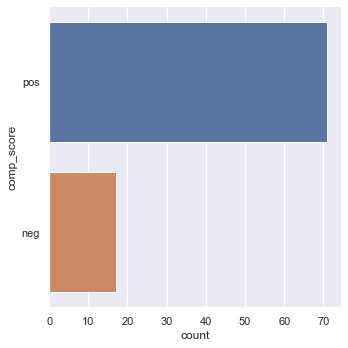

In [167]:
sb.catplot(y = 'comp_score', data = pred, kind = "count")
countY, countX = pred.comp_score.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)

<AxesSubplot:xlabel='Adj Close', ylabel='comp_score'>

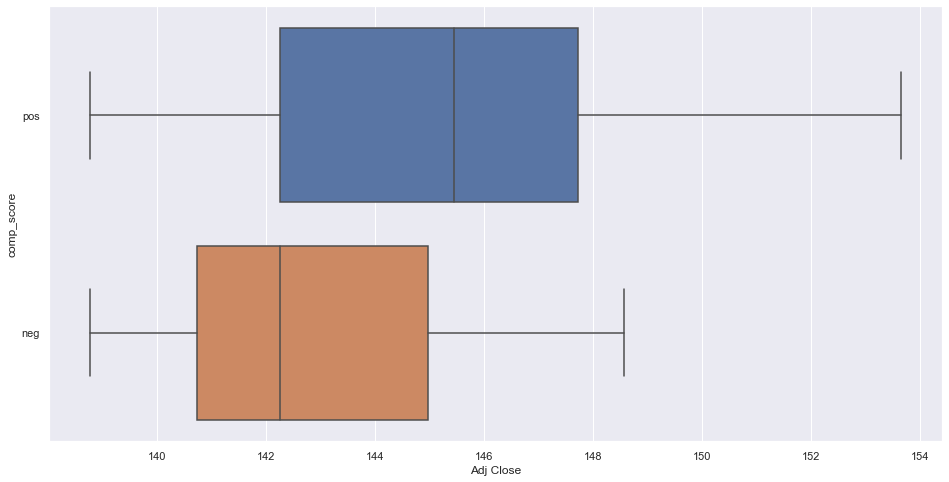

In [171]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Adj Close', y = 'comp_score', data = pred)

In [164]:
x = pd.DataFrame(pred['Adj Close'])
y = pd.DataFrame(pred['comp_score'])

x_train, x_test, y_train, y_test = train_test_split( x, y,  test_size = 0.2)
# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (70, 1) (70, 1)
Test Set  : (18, 1) (18, 1)


[Text(334.8, 543.6, 'Adj Close <= 145.557\ngini = 0.32\nsamples = 70\nvalue = [14, 56]\nclass = Pos'),
 Text(167.4, 326.16, 'Adj Close <= 139.743\ngini = 0.438\nsamples = 37\nvalue = [12, 25]\nclass = Pos'),
 Text(83.7, 108.72000000000003, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Neg'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.415\nsamples = 34\nvalue = [10, 24]\nclass = Pos'),
 Text(502.20000000000005, 326.16, 'Adj Close <= 147.118\ngini = 0.114\nsamples = 33\nvalue = [2, 31]\nclass = Pos'),
 Text(418.5, 108.72000000000003, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = Pos'),
 Text(585.9, 108.72000000000003, 'gini = 0.153\nsamples = 24\nvalue = [2, 22]\nclass = Pos')]

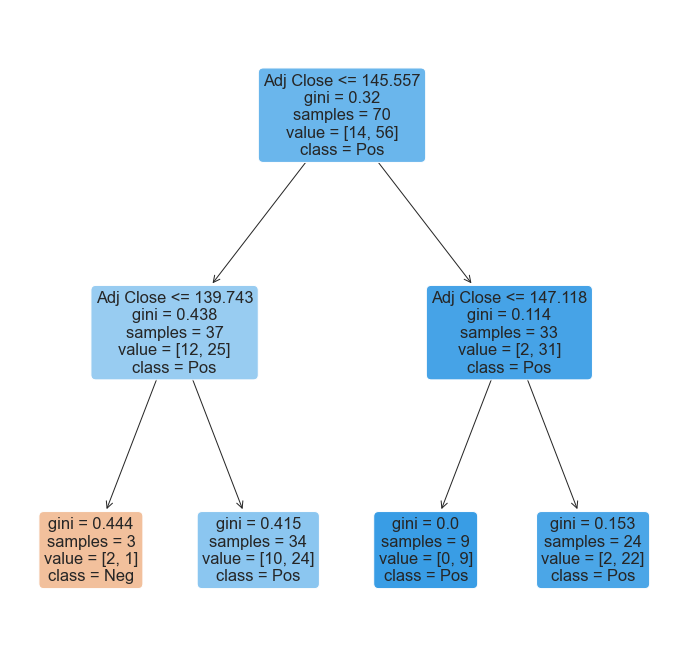

In [169]:
dectree4.fit(x_train,y_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["Adj Close"], 
          class_names=["Neg","Pos"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8142857142857143

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7777777777777778

Train set
True Positive Rate 	:  0.9464285714285714
False Positive Rate 	:  0.7142857142857143
Train set
True Positive Rate 	:  0.8666666666666667
False Positive Rate 	:  0.6666666666666666


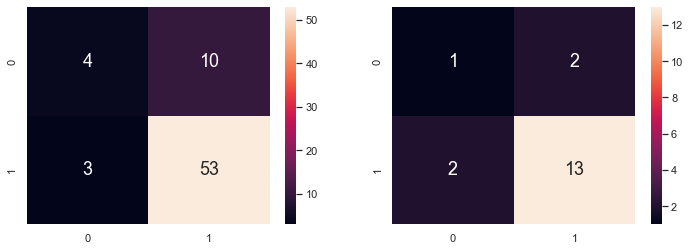

In [170]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree4.predict(x_train)
y_test_pred = dectree4.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


cftr = confusion_matrix(y_train, y_train_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

cftr = confusion_matrix(y_test, y_test_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

## Full Data (Ignore this)

Ignore This 

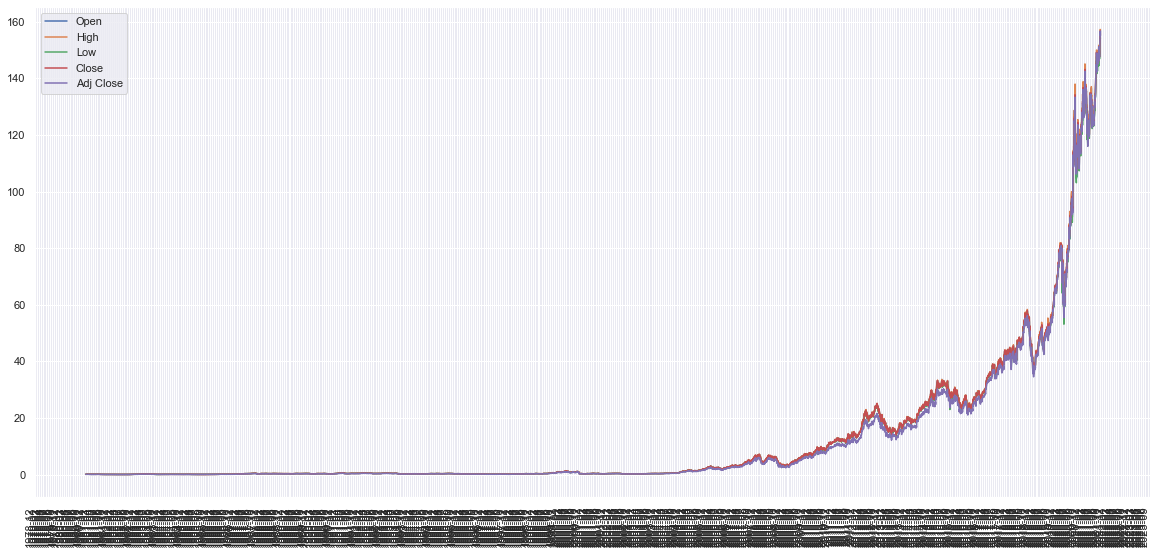

In [169]:
apo1 = apo[["Date","Open","High","Low","Close","Adj Close"]]

apo1.set_index('Date', inplace = True)
apo1.index = pd.to_datetime(apo1.index).date
ax = apo1.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xticks(rotation=90);

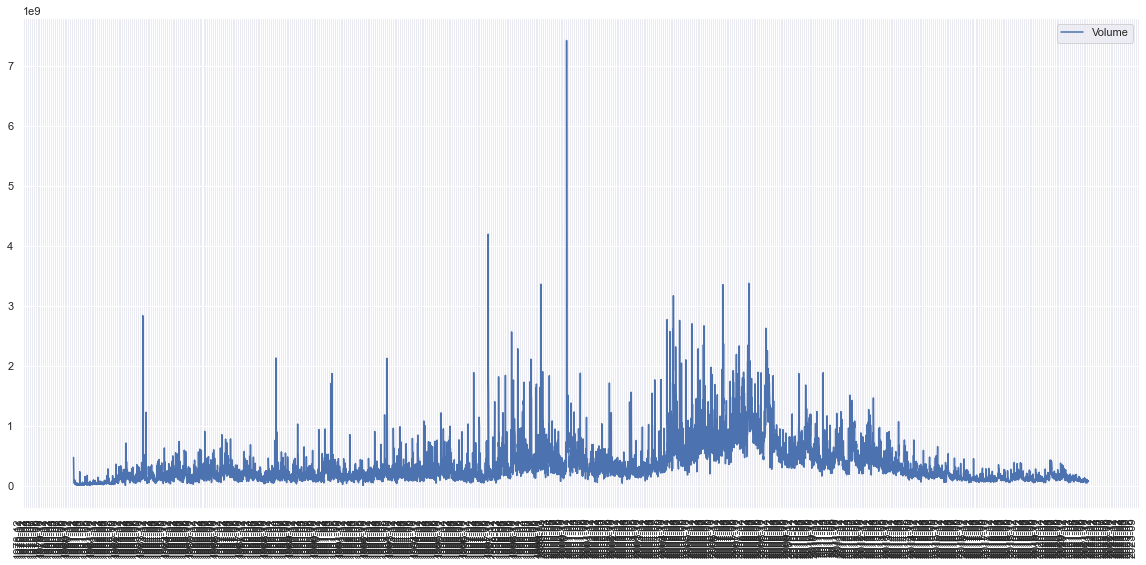

In [145]:
apo2 = apo[["Date","Volume"]]

apo2.set_index('Date', inplace = True)
apo2.index = pd.to_datetime(apo2.index).date
ax = apo2.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xticks( rotation=90);